In [136]:
import numpy as np
import matplotlib.pyplot as plt

# Curve Fit
from scipy.optimize import curve_fit

# Data as NumPy array
data = np.array([
    [2, 431326, 1316298, 49.0],  # ID, Easting, Northing, Thickness coal layer
    [3, 398753, 1316124, 32.0], 
    [4, 352156, 1316015, 37.0], 
    [5, 365531, 1315818, 49.0], 
    [7, 382816, 1314601, 55.0], 
    [9, 430850, 1301508, 48.0], 
    [10, 398805, 1301506, 57.0], 
    [11, 352234, 1299533, 37.0], 
    [12, 366769, 1300871, 50.0], 
    [13, 414876, 1300240, 56.0], 
    [14, 382892, 1299775, 58.0], 
    [16, 416097, 1284247, 60.0], 
    [17, 430593, 1284243, 47.0], 
    [18, 400291, 1284132, 87.0], 
    [19, 384138, 1283859, 53.0], 
    [20, 368123, 1283849, 56.0], 
    [21, 351956, 1283728, 36.0], 
    [23, 366138, 1268773, 55.0], 
    [24, 383559, 1268661, 60.0], 
    [25, 431915, 1268363, 70.0], 
    [26, 415962, 1268347, 75.0], 
    [27, 399884, 1268720, 63.0], 
    [28, 352933, 1268254, 34.0], 
    [30, 352738, 1253951, 21.0], 
    [31, 384499, 1253969, 62.0], 
    [32, 400076, 1252554, 79.0], 
    [33, 415868, 1256420, 57.0], 
    [34, 368579, 1250159, 44.0], 
    [35, 430979, 1251072, 81.5], 
    [37, 352979, 1237155, 30.0], 
    [38, 368493, 1236862, 37.0], 
    [39, 399741, 1236607, 77.0], 
    [40, 432107, 1236582, 70.5], 
    [41, 384280, 1236527, 58.0], 
    [42, 415737, 1236459, 78.0], 
    [44, 352743, 1221026, 10.0], 
    [45, 368483, 1220742, 26.0], 
    [46, 431473, 1220645, 59.0], 
    [47, 399596, 1220598, 92.0], 
    [48, 415817, 1220477, 86.0], 
    [49, 384411, 1220477, 32.0], 
    [51, 367180, 1206180, 17.0], 
    [52, 399353, 1205906, 99.0], 
    [53, 417304, 1204922, 76.0], 
    [54, 384456, 1204470, 28.0], 
    [55, 432027, 1203507, 52.0], 
    [56, 351466, 1203245, 11.0], 
    [123, 356115, 1295788, 35.0], 
    [145, 360095, 1291759, 38.0], 
    [166, 362980, 1289047, 42.0], 
    [216, 371863, 1277272, 50.0], 
    [234, 377019, 1272660, 57.0], 
    [282, 387755, 1264534, 60.0], 
    [299, 391477, 1261727, 70.0], 
    [318, 395814, 1257798, 58.0], 
    [380, 403832, 1248290, 75.0], 
    [406, 407848, 1243143, 81.0], 
    [427, 411790, 1240470, 84.0], 
    [470, 419690, 1232449, 92.0], 
    [497, 422447, 1228465, 90.0], 
    [512, 427604, 1224958, 46.0], 
    [1001, 415000, 1316000, 45.0]
])



In [137]:
x_o = data[:,1:3]
z = data[:,3]

In [138]:
# plt.scatter(x_o[:,0],x_o[:,1])
# plt.axis("equal")
# plt.show()

In [139]:
n_datapoints = len(z)
n_datapoints

62

In [140]:
## Histogram for Distances
dists = np.linalg.norm(x_o[:,np.newaxis] - x_o[np.newaxis,:],axis=-1)

n_bins = 30

select_max_dist = 100 # %

# Histogramm
hist, bin_edges = np.histogram(dists,n_bins,range=(0,np.percentile(dists,select_max_dist)))

# Mean Lag h in each class
bin_centers = (bin_edges[1:]+bin_edges[:-1])/2 # h


## Z Values Diff
z_diff = z[:,np.newaxis] - z[np.newaxis,:]

print("-------------")
print("Max used distance:",np.percentile(dists,80)/1000,"km ("+str(select_max_dist)+" %)")
print("-------------")

-------------
Max used distance: 79.08834617059583 km (100 %)
-------------


In [141]:
## Semivariance
semi_var = np.zeros(len(hist)) * np.nan

# Iterate over all lag classes
for i in range(len(hist)):
    
    # Selecting all Z values in the actual Lag Class (h or dist-class)
    diff = z_diff[(dists >= bin_edges[i]) & (dists < bin_edges[i+1])]

    # plt.figure()
    # im = plt.imshow((dists >= bin_edges[i]) & (dists < bin_edges[i+1]),origin="lower",cmap="Greys_r")
    # plt.colorbar(im)
    # plt.show()

    # Count Distances in class
    n = np.sum((dists >= bin_edges[i]) & (dists < bin_edges[i+1]) ) # number of distances in class i
    
    # Semivariance for Class i
    semi_var[i] = 1 / (n*2) * np.sum( diff**2 )

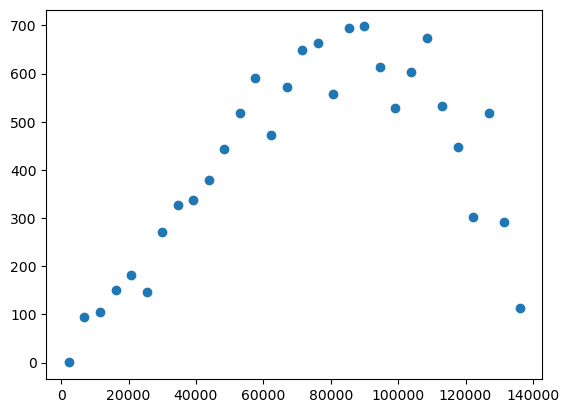

In [142]:
plt.scatter(bin_centers,semi_var)
plt.show()

In [143]:
## Fit Variance  Models


def spherical(h, c0, c, a):
    semivar = np.zeros_like(h)
    mask0 = h == 0
    mask1 = (h > 0 ) & (h <= a)
    mask2 = h > a
    semivar[mask0] = 0
    semivar[mask1] = c0 + c * (3 * h[mask1] / (2 * a) - 0.5 * (h[mask1] / a) ** 3)
    semivar[mask2] = c0 + c
    return semivar


def spherical_cov(h, c0, c, a):
    covariance = np.zeros_like(h)
    mask1 = (h > 0 ) & (h <= a)
    mask2 = h == 0
    covariance[mask1] = c - c * (3 * h[mask1] / (2 * a) - 0.5 * (h[mask1] / a) ** 3)
    covariance[mask2] = c0 + c # Nugget effect
    # covariance for h > a is already Zero due to covariance initalization
    return covariance


x = bin_centers # Drop first element to remove peak/disturbance
y = semi_var
# TODO hinzufügen von bounds wie in https://scikit-gstat.readthedocs.io/en/latest/technical/fitting.html
p0 = [0, np.mean(x_o[:,1]), np.mean(x_o[:,0])]
cof_u, cov = curve_fit(spherical, x, y,p0 = p0 )

print(f"Nugget (C_0): {cof_u[0]:.2f}")
print(f"Sill (C_1): {cof_u[1]:.2f}")
print(f"Range (a): {cof_u[2]:.2f}")
print(f"max Var: {cof_u[0]+cof_u[1]:.2f}")


Nugget (C_0): -37.62
Sill (C_1): 567.02
Range (a): 73869.83
max Var: 529.40


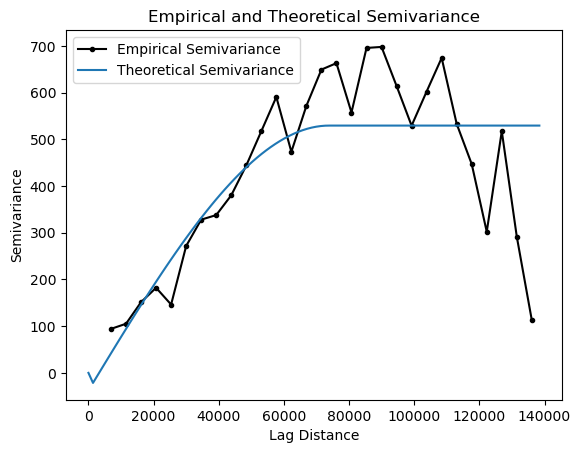

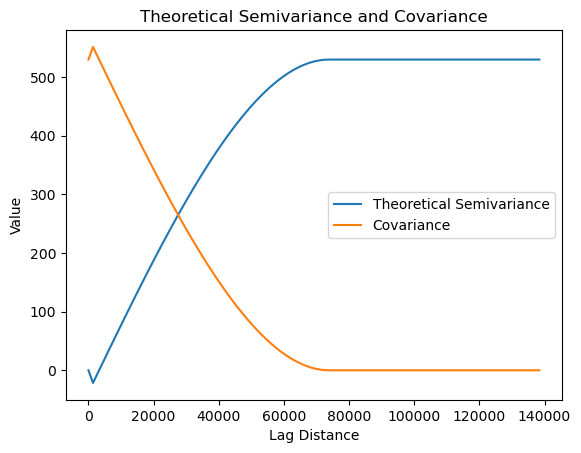

In [144]:
# Plot Spherical Model
h_theo = np.linspace(0,bin_edges.max(),100)
semivar_theo = spherical(h_theo,cof_u[0],cof_u[1],cof_u[2])

cov = spherical_cov(h_theo,cof_u[0],cof_u[1],cof_u[2])

plt.plot(bin_centers[1:], semi_var[1:], marker='o', ms=3, c="k", label='Empirical Semivariance')
plt.plot(h_theo, semivar_theo, label='Theoretical Semivariance')
plt.xlabel('Lag Distance')
plt.ylabel('Semivariance')
plt.title('Empirical and Theoretical Semivariance')
plt.legend()
plt.show()

plt.plot(h_theo, semivar_theo, label='Theoretical Semivariance')
plt.plot(h_theo, cov, label='Covariance')
plt.xlabel('Lag Distance')
plt.ylabel('Value')
plt.title('Theoretical Semivariance and Covariance')
plt.legend()
plt.show()

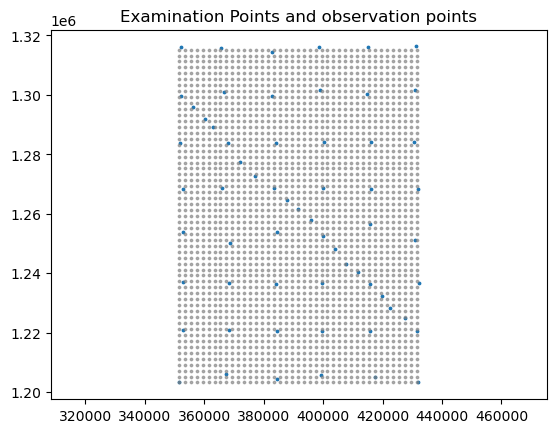

In [145]:
# Map range Bangladesh
n_range = (x_o[:,1].min(),x_o[:,1].max())
e_range = (x_o[:,0].min(),x_o[:,0].max())

# Interpolation Coords
res = 2000
x_n, x_e = np.mgrid[n_range[0]:n_range[1]:res,e_range[0]:e_range[1]:res]

x_p = np.asarray([x_e.flatten(),x_n.flatten()]) # points of interpolation
x_p = x_p.T # Transverse to make it vertical


plt.title("Examination Points and observation points")
plt.scatter(x_o[:,0],x_o[:,1],s=3)
plt.scatter(x_p[:,0],x_p[:,1],s=3,c="grey",alpha=0.6)
plt.axis("equal")
plt.show()


Simple Kriging

C:\Users\Florian\AppData\Local\Temp\ipykernel_17336\1040670486.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z_sk[i] = (lam.T @ (z-m) ) + m # interpolated value


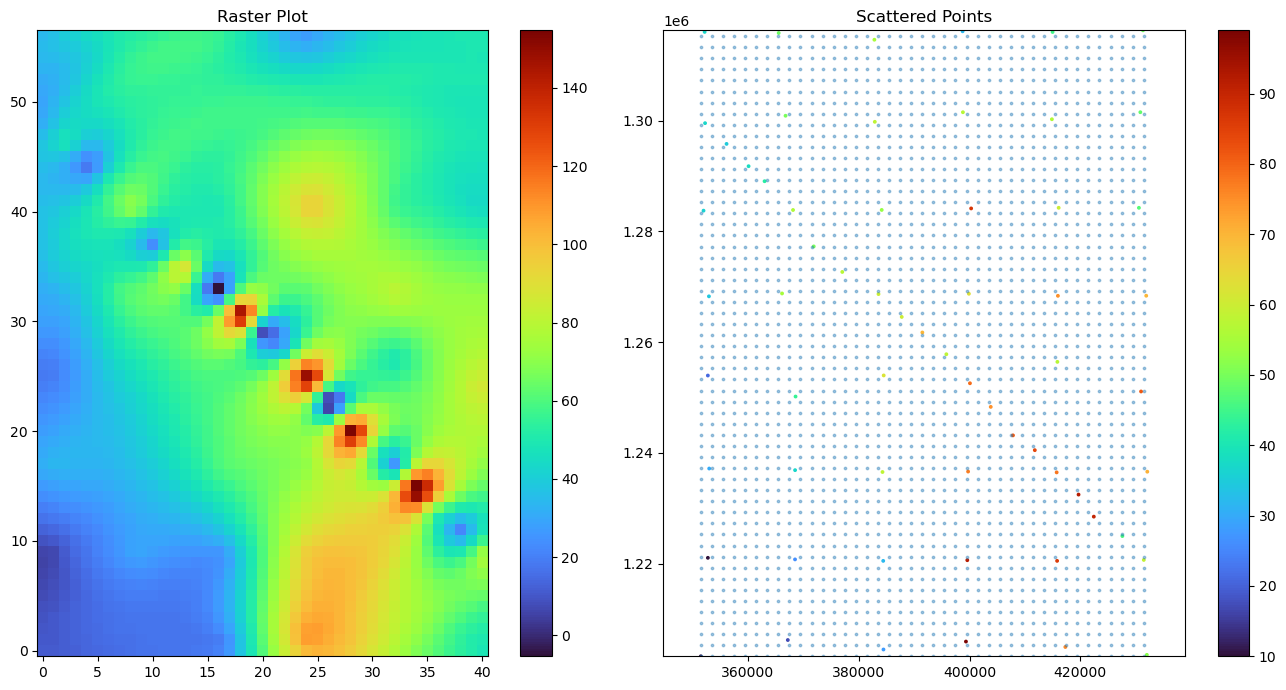

In [146]:
dists = np.linalg.norm(x_o[:,np.newaxis] - x_o[np.newaxis,:],axis=-1)

# Covariance for all Observation Points
C = spherical_cov(dists,cof_u[0],cof_u[1],cof_u[2]) # TODO include local search area to cut computing costs

# Calculating Inverse
C_iv = np.linalg.inv(C) ## TODO Problem mit der Inversen scheinbar?

# Mean to detrend Z
m = z.mean()


Z_sk = np.empty(x_p.shape[0])
for i in range(x_p.shape[0]):

    dists_p = np.linalg.norm(x_o[:] - x_p[i,:],axis=-1) # Distances to interpolation point (Point in grid)
    
    c_0 = spherical_cov(dists_p,cof_u[0],cof_u[1],cof_u[2]) # Covariance between interpolation point an all Data Points
    
    lam = C_iv @ c_0[:, None] # Weights based on cavariance and dinstance (Cov in c_0)
    
    #lam = np.linalg.solve(C,c_0[:,None])

    #print(i,np.sum(lam))

    Z_sk[i] = (lam.T @ (z-m) ) + m # interpolated value

Z_sk = Z_sk.reshape(x_e.shape)

Zsk_1 = Z_sk

fig, ax = plt.subplots(ncols=2, figsize=(14, 7))

# Plot the raster on the left
im = ax[0].imshow(Z_sk, origin="lower",cmap="turbo", vmin=np.nanpercentile(Z_sk, 0), vmax=np.nanpercentile(Z_sk, 100))
fig.colorbar(im, ax=ax[0])
ax[0].set_title('Raster Plot')

# Plot the scattered points on the right
sc = ax[1].scatter(x_o[:, 0], x_o[:, 1], s=3,c=z,cmap="turbo")
ax[1].scatter(x_p[:,0],x_p[:,1],s=3,alpha=0.4)
ax[1].set_title('Scattered Points')
plt.colorbar(sc,ax=ax[1])
ax[1].axis("equal")
ax[1].set_xlim(e_range)
ax[1].set_ylim(n_range)

plt.tight_layout()
plt.show()

Simple Kriging with local neighborhood

Range (a): 73869.83


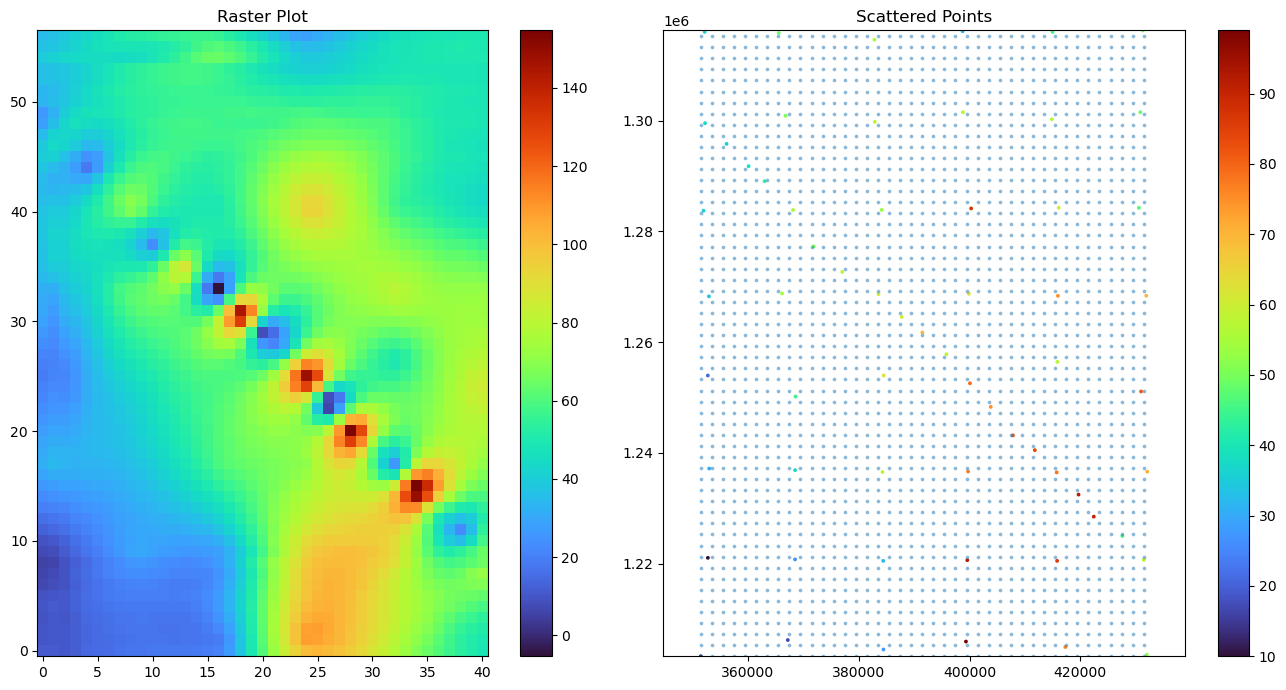

In [147]:
import sys
max_range = cof_u[2] * 1
print(f"Range (a): {cof_u[2]:.2f}")


Z_sk = np.empty(x_p.shape[0])
for i in range(x_p.shape[0]):

    # Select Neigborhod of examination/interpolation Point according to range Parameter
    neighborhood = (  (x_o[:,0] <= (x_p[i,0] + max_range))  & (x_o[:,0] >= (x_p[i,0] - max_range))  )  & (  (x_o[:,1] <= (x_p[i,1] + max_range))  & (x_o[:,1] >= (x_p[i,1] - max_range))   ) # mask for x & y

    # Calculate Dists and Covariance for selected Neigborhouds and Interpolation Point
    dists = np.linalg.norm(x_o[neighborhood,np.newaxis] - x_o[np.newaxis,neighborhood],axis=-1)
    C = spherical_cov(dists,cof_u[0],cof_u[1],cof_u[2])
    dists_p = np.linalg.norm(x_o[neighborhood,:] - x_p[i,:],axis=-1) # Distances to interpolation point (Point in grid)
    c_0 = spherical_cov(dists_p,cof_u[0],cof_u[1],cof_u[2]) # Covariance between interpolation point an all Data Points
    
    # Check if the matrix is singular
    if C.size == 0:
        print(f"Covariance matrix is empty at index {i}, skipping this point.")
        continue
    if np.linalg.cond(C) < 1/sys.float_info.epsilon:
        lam = np.linalg.solve(C, c_0)
    else:
        print(f"Matrix is singular at index {i}, skipping this point.")
        continue

    #print(i,np.sum(lam))

    Z_sk[i] = (lam.T @ (z[neighborhood]-m) ) + m # interpolated value


# Reshape
Z_sk = Z_sk.reshape(x_e.shape)

Zsk_2 = Z_sk

fig, ax = plt.subplots(ncols=2, figsize=(14, 7))

# Plot the raster on the left
im = ax[0].imshow(Z_sk, origin="lower",cmap="turbo", vmin=np.nanpercentile(Z_sk, 0), vmax=np.nanpercentile(Z_sk, 100))
fig.colorbar(im, ax=ax[0])
ax[0].set_title('Raster Plot')

# Plot the scattered points on the right
sc = ax[1].scatter(x_o[:, 0], x_o[:, 1], s=3,c=z,cmap="turbo")
ax[1].scatter(x_p[:,0],x_p[:,1],s=3,alpha=0.4)
ax[1].set_title('Scattered Points')
plt.colorbar(sc,ax=ax[1])
ax[1].axis("equal")
ax[1].set_xlim(e_range)
ax[1].set_ylim(n_range)

plt.tight_layout()
plt.show()


Ordinary Kriging

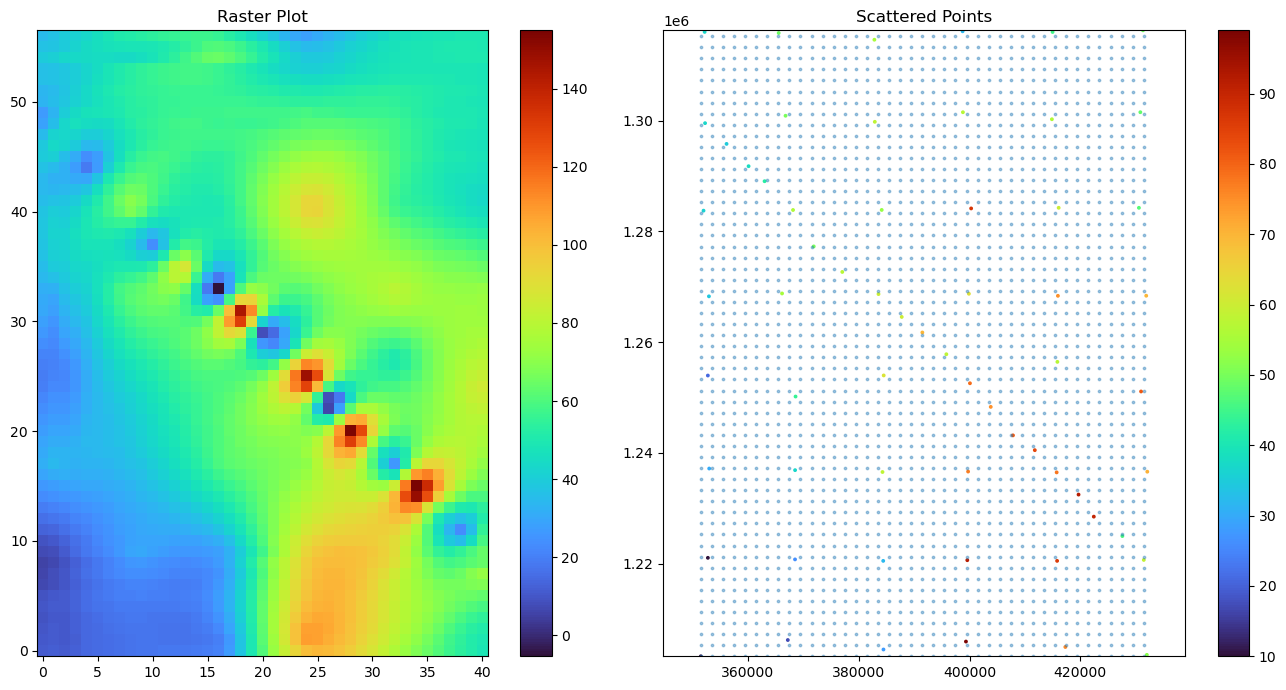

In [148]:

Z_sk = np.empty(x_p.shape[0]) * np.nan
mu = np.empty(x_p.shape[0]) * np.nan
for i in range(x_p.shape[0]):

    # Select Neigborhod of examination/interpolation Point according to range Parameter
    neighborhood = (  (x_o[:,0] <= (x_p[i,0] + max_range))  & (x_o[:,0] >= (x_p[i,0] - max_range))  )  & (  (x_o[:,1] <= (x_p[i,1] + max_range))  & (x_o[:,1] >= (x_p[i,1] - max_range))   ) # mask for x & y

    # Calculate Dists and Covariance for selected Neigborhouds and Interpolation Point
    dists = np.linalg.norm(x_o[neighborhood,np.newaxis] - x_o[np.newaxis,neighborhood],axis=-1)
    C = spherical_cov(dists,cof_u[0],cof_u[1],cof_u[2])
    C_cond = np.ones((C.shape[0]+1,C.shape[1]+1))
    C_cond[:-1,:-1] = C
    C_cond[-1,-1] = 0

    dists_p = np.linalg.norm(x_o[neighborhood,:] - x_p[i,:],axis=-1) # Distances to interpolation point (Point in grid)
    c_0 = spherical_cov(dists_p,cof_u[0],cof_u[1],cof_u[2]) # Covariance between interpolation point an all Data Points
    c_0_cond = np.ones((c_0.shape[0]+1))
    c_0_cond[:-1] = c_0

    # Check if the matrix is singular
    if C.size == 0:
        print(f"Covariance matrix is empty at index {i}, skipping this point.")
        continue
    if np.linalg.cond(C) < 1/sys.float_info.epsilon:
        lam_mu = np.linalg.solve(C_cond, c_0_cond)
    else:
        print(f"Matrix is singular at index {i}, skipping this point.")
        print(np.linalg.cond(C), 1/sys.float_info.epsilon)
        continue
    
    mu[i] = lam_mu[-1] # Last element is lagrange multiplicator
    #print(i,np.sum(lam))

    Z_sk[i] = lam_mu[:-1].T @ z[neighborhood]  # interpolated value



# Reshape
Z_sk = Z_sk.reshape(x_e.shape)

fig, ax = plt.subplots(ncols=2, figsize=(14, 7))

# Plot the raster on the left
im = ax[0].imshow(Z_sk, origin="lower",cmap="turbo", vmin=np.nanpercentile(Z_sk, 0), vmax=np.nanpercentile(Z_sk, 100))
fig.colorbar(im, ax=ax[0])
ax[0].set_title('Raster Plot')

# Plot the scattered points on the right
sc = ax[1].scatter(x_o[:, 0], x_o[:, 1], s=3,c=z,cmap="turbo")
ax[1].scatter(x_p[:,0],x_p[:,1],s=3,alpha=0.4)
ax[1].set_title('Scattered Points')
plt.colorbar(sc,ax=ax[1])
ax[1].axis("equal")
ax[1].set_xlim(e_range)
ax[1].set_ylim(n_range)

plt.tight_layout()
plt.show()


Ordenary indikator Kriging


In [149]:
# Function Definition Variogram
def semivariance(x_o,z,n_bins,max_dist_percent = 100):
    """
    Calculate the semivariance gamma(h) for a given set of coordinates and attribute values.

    Parameters:
    x_o : numpy.ndarray
        Array of shape (n_points, 2) containing the coordinates of the observation points.
    z : numpy.ndarray
        Array of shape (n_points,) containing the attribute values at the observation points.
    n_bins : int
        Number of bins to use for the histogram of distances.
    max_dist_percent : int
        Maximum distance percentile to consider for the semivariance calculation.

    Returns:
    semi_var : numpy.ndarray
        Array containing the calculated semivariance for each lag class.
    h_bin_centers : numpy.ndarray
        Array containing the mean lag distance for each class.
    """
    
    ## Positions
    dists = np.linalg.norm(x_o[:,np.newaxis] - x_o[np.newaxis,:],axis=-1) # All Distances between all points
    # Histogramm
    hist, bin_edges = np.histogram(dists,n_bins,range=(0,np.percentile(dists,max_dist_percent)))
    # Mean Lag h in each class
    h_bin_centers = (bin_edges[1:]+bin_edges[:-1])/2

    ## Z Values
    z_diff = z[:,np.newaxis] - z[np.newaxis,:]
    # Print out some information
    print("Max used distance:",round(np.percentile(dists,80)/1000,2),"km ("+str(max_dist_percent)+" %)")
    print(f"Number of Bins n: {n_bins}")

    ## Semivariance (gamma(h))
    semi_var = np.zeros(len(hist)) * np.nan
    for i in range(len(hist)): # Iterate over all lag classes
        
        # Selecting all Z values in the actual Lag Class (h or dist-class)
        diff = z_diff[(dists >= bin_edges[i]) & (dists < bin_edges[i+1])]

        # Count Distances in class
        n = np.sum((dists >= bin_edges[i]) & (dists < bin_edges[i+1]) ) # number of distances in class i
        
        # Semivariance for Class i
        semi_var[i] = 1 / (n*2) * np.sum( diff**2 )

    return semi_var, h_bin_centers

semi_var, h_bin_centers = semivariance(x_o,z,n_bins,max_dist_percent=select_max_dist)


Max used distance: 79.09 km (100 %)
Number of Bins n: 30


In [150]:
## Semivariance
semi_var, h_bin_centers = semivariance(x_o,(z>=15).astype(int),n_bins,max_dist_percent=85)

## Semivariance Model fitting
p0 = [0, np.mean(semi_var), np.median(x_o[:,0])]

cof_u, cov = curve_fit(spherical, h_bin_centers, semi_var,p0 = p0 )

indicator_cofs = cof_u

Max used distance: 79.09 km (85 %)
Number of Bins n: 30


In [151]:
cof_u

array([-1.07303962e-02,  1.32561967e+02,  2.54915461e+08])

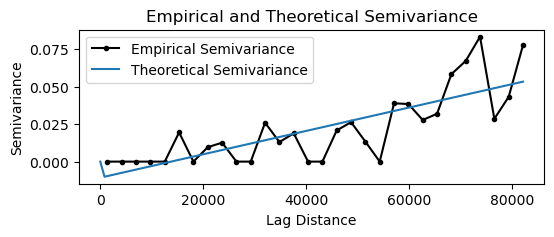

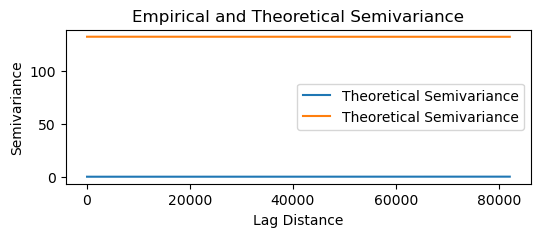

In [152]:

# Plot Spherical Model
h_theo = np.linspace(0,h_bin_centers.max(),100)
semivar_theo = spherical(h_theo,cof_u[0],cof_u[1],cof_u[2])

cov = spherical_cov(h_theo,cof_u[0],cof_u[1],cof_u[2])

plt.figure(figsize=(6,2))
plt.plot(h_bin_centers, semi_var, marker='o', ms=3, c="k", label='Empirical Semivariance')
plt.plot(h_theo, semivar_theo, label='Theoretical Semivariance')
plt.xlabel('Lag Distance')
plt.ylabel('Semivariance')
plt.title('Empirical and Theoretical Semivariance')
plt.legend()
plt.show()

plt.figure(figsize=(6,2))
plt.plot(h_theo, semivar_theo, label='Theoretical Semivariance')
plt.plot(h_theo, cov, label='Theoretical Semivariance')
plt.xlabel('Lag Distance')
plt.ylabel('Semivariance')
plt.title('Empirical and Theoretical Semivariance')
plt.legend()
plt.show()


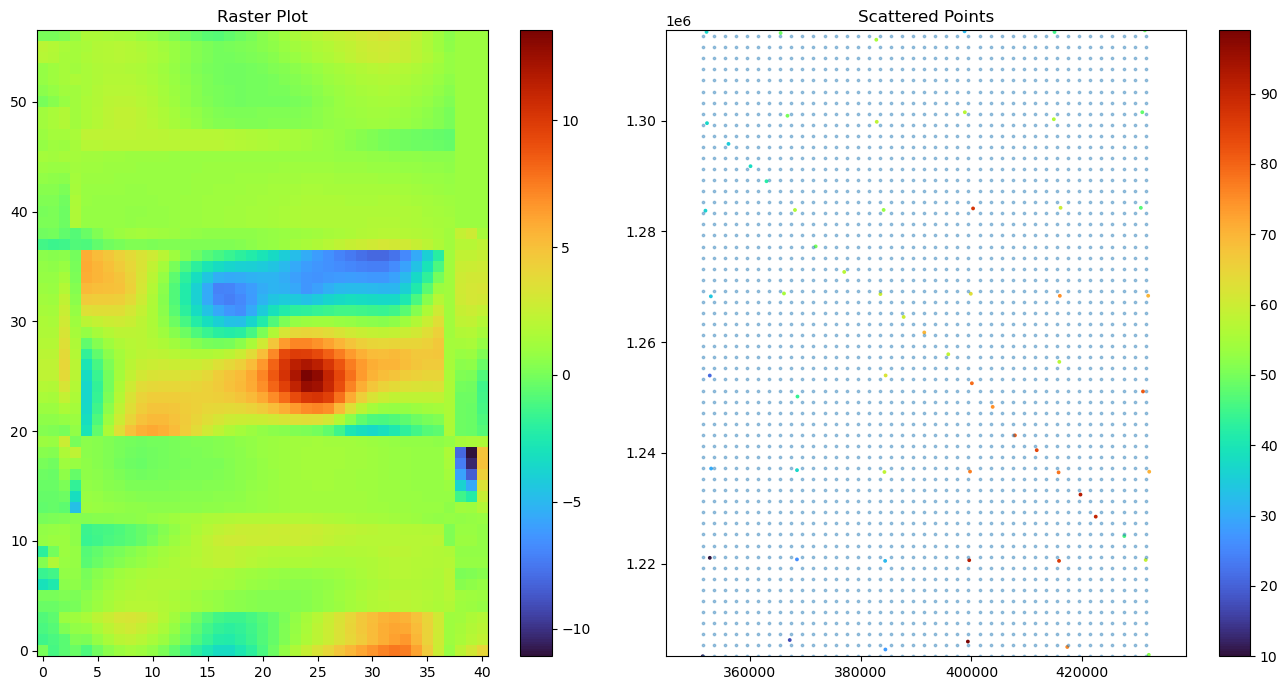

In [153]:
z_indic = (z>=25).astype(int)

Z_sk = np.empty(x_p.shape[0]) * np.nan
mu = np.empty(x_p.shape[0]) * np.nan
for i in range(x_p.shape[0]):

    # Select Neigborhod of examination/interpolation Point according to range Parameter
    neighborhood = (  (x_o[:,0] <= (x_p[i,0] + max_range))  & (x_o[:,0] >= (x_p[i,0] - max_range))  )  & (  (x_o[:,1] <= (x_p[i,1] + max_range))  & (x_o[:,1] >= (x_p[i,1] - max_range))   ) # mask for x & y

    # Calculate Dists and Covariance for selected Neigborhouds and Interpolation Point
    dists = np.linalg.norm(x_o[neighborhood,np.newaxis] - x_o[np.newaxis,neighborhood],axis=-1)
    C = spherical_cov(dists,cof_u[0],cof_u[1],cof_u[2])
    C_cond = np.ones((C.shape[0]+1,C.shape[1]+1))
    C_cond[:-1,:-1] = C
    C_cond[-1,-1] = 0

    dists_p = np.linalg.norm(x_o[neighborhood,:] - x_p[i,:],axis=-1) # Distances to interpolation point (Point in grid)
    c_0 = spherical_cov(dists_p,cof_u[0],cof_u[1],cof_u[2]) # Covariance between interpolation point an all Data Points
    c_0_cond = np.ones((c_0.shape[0]+1))
    c_0_cond[:-1] = c_0

    
    # Check if the matrix is singular
    if C.size == 0:
        print(f"Covariance matrix is empty at index {i}, skipping this point.")
        continue
    if np.linalg.cond(C) < 1/sys.float_info.epsilon:
        lam_mu = np.linalg.solve(C_cond, c_0_cond)
    else:
        print(f"Matrix is singular at index {i}, skipping this point.")
        print(np.linalg.cond(C), 1/sys.float_info.epsilon)
        continue
    
    mu[i] = lam_mu[-1] # Last element is lagrange multiplicator
    #print(i,np.sum(lam))

    Z_sk[i] = lam_mu[:-1].T @ z_indic[neighborhood]  # interpolated value



# Reshape
Z_sk = Z_sk.reshape(x_e.shape)

fig, ax = plt.subplots(ncols=2, figsize=(14, 7))

# Plot the raster on the left
im = ax[0].imshow(Z_sk, origin="lower",cmap="turbo", vmin=np.nanpercentile(Z_sk, 0), vmax=np.nanpercentile(Z_sk, 100))
fig.colorbar(im, ax=ax[0])
ax[0].set_title('Raster Plot')

# Plot the scattered points on the right
sc = ax[1].scatter(x_o[:, 0], x_o[:, 1], s=3,c=z,cmap="turbo")
ax[1].scatter(x_p[:,0],x_p[:,1],s=3,alpha=0.4)
ax[1].set_title('Scattered Points')
plt.colorbar(sc,ax=ax[1])
ax[1].axis("equal")
ax[1].set_xlim(e_range)
ax[1].set_ylim(n_range)

plt.tight_layout()
plt.show()
